In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

news_df=pd.read_csv('/content/gdrive/MyDrive/FS-Sem3/CompanyProject_RegHub/news_df_with_company_names.csv')
print(f"Length of raw dataframe = {len(news_df)}")
news_df.head(2)

Mounted at /content/gdrive
Length of raw dataframe = 2888


,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type,llm_output_company,companies_in_news
0,focScholzPresid217207826html,[],2023-10-03T16:59:33.000Z,CumExAffäre: Brisante Tagebucheinträge belaste...,[],NaN,en,NaN,The article discusses how M.M. Warburg may hav...,NaN,...,The article discusses how M.M. Warburg may hav...,"[{""description"":""M.M. Warburg"",""relevance"":12,...",Press releases,NaN,0.0,Global,focus.de,Information Provider,'The article discusses how M.M. Warburg may ha...,"M.M. Warburg, The Scandal"
1,merngnisPresente92556026html,[],2023-10-03T16:06:01.000Z,CumExAffäre: Dokumente bringen Scholz offenbar...,[],NaN,en,NaN,The Cologne Prosecutor's Office accuses German...,NaN,...,The Cologne Prosecutor's Office accuses German...,"[{""description"":""M.M. Warburg"",""relevance"":6,""...",Press releases,NaN,0.0,Global,merkur.de,Information Provider,'The Cologne Prosecutor's Office accuses Germa...,"Cologne, Prosecutor, Office, Olaf, Scholz, War..."


In [3]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2888 non-null   object 
 1   found_dates         2543 non-null   object 
 2   news_date           2888 non-null   object 
 3   news_title          2888 non-null   object 
 4   internal_links      2509 non-null   object 
 5   keywords            62 non-null     object 
 6   language            2888 non-null   object 
 7   news_author         14 non-null     object 
 8   news_content        2888 non-null   object 
 9   news_label          31 non-null     object 
 10  news_legalinforce   2888 non-null   bool   
 11  news_link           2888 non-null   object 
 12  news_rank           2888 non-null   int64  
 13  news_summary        2888 non-null   object 
 14  news_topic          2888 non-null   object 
 15  news_type           2888 non-null   object 
 16  sentim

<Axes: >

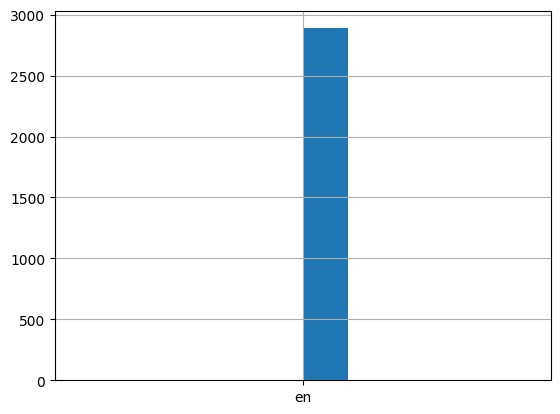

In [4]:
news_df.language.hist()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=5b07246cccb7b8d31c0a396a3fc9ef5bde60bc95c7f19ac14fb34d47422d2d55
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


<Axes: >

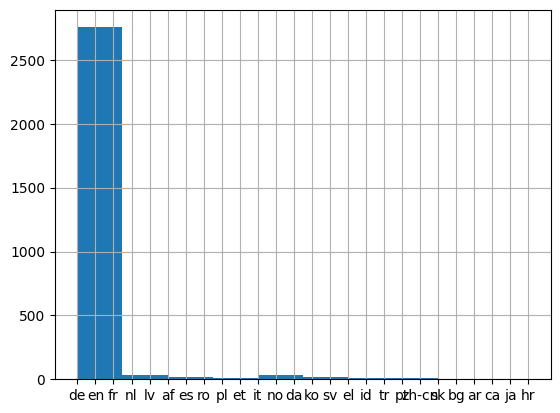

In [5]:
# There are still rows of news that are wrongly labelled as English, even if they are not in English.
# We check this through 'langdetect' python library
!pip install langdetect
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0
for index, row in news_df.iterrows():
  news_df.at[index, 'language'] = detect(row['news_title'])

news_df.language.hist()

In [6]:
# hereonwards, only working on news with english language
news_df_en = news_df[news_df.language == 'en']
news_df_en = news_df_en.reset_index(drop=True)
print(len(news_df_en))
news_df_en.head(5)

1210


,id,found_dates,news_date,news_title,internal_links,keywords,language,news_author,news_content,news_label,...,news_summary,news_topic,news_type,sentiment_label,sentiment_score,source_country,source_name,source_type,llm_output_company,companies_in_news
0,maretBeatPresfiling20231003,[],2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,[],NaN,en,NaN,Deutsche Bank AG has acquired an additional 49...,NaN,...,Deutsche Bank AG has acquired an additional 49...,"[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,marketbeat.com,Information Provider,'Deutsche Bank AG has acquired an additional 4...,"Deutsche Bank AG, Company A"
1,busTIMESPresesginvestingubs,[],2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,[],NaN,en,NaN,The UBS APAC Sustainable Finance Conference 20...,NaN,...,The UBS APAC Sustainable Finance Conference 20...,"[{""description"":""Sustainability"",""relevance"":6...",Press releases,NaN,0.0,Global,businesstimes.com.sg,Information Provider,'The UBS APAC Sustainable Finance Conference 2...,UBS.
2,pubDubaiPresE6B703F1696322785,"[{""description"":""2023-10-03"",""relevance"":1,""co...",2023-10-03T13:48:51.000Z,Julius Baer strengthens its External Asset Man...,[],NaN,en,NaN,Swiss private bank Julius Baer is focusing on ...,NaN,...,Swiss private bank Julius Baer is focusing on ...,"[{""description"":""Bank Julius Bär"",""relevance"":...",Press releases,NaN,0.0,Global,publicnow.com,Information Provider,'Swiss private bank Julius Baer is focusing on...,Julius Baer.
3,einNNewsPres02billionby2027,[],2023-10-03T12:10:30.000Z,Investment Banking & Trading Services Market S...,[],NaN,en,NaN,The article discusses how major global investm...,NaN,...,The article discusses how major global investm...,"[{""description"":""Deutsche Bank"",""relevance"":6,...",Press releases,NaN,0.0,Global,einnews.com,Information Provider,'The article discusses how major global invest...,"Deutsche Bank, Credit Suisse, JPMorgan Chase, ..."
4,finwscomPresmanagementcrypto,[],2023-10-03T11:56:08.000Z,The New «Swiss» Finance Mecca finews.com,[],NaN,en,NaN,Nowhere else is wealth management flourishing ...,NaN,...,Nowhere else is wealth management flourishing ...,"[{""description"":""Compliance"",""relevance"":30,""c...",Press releases,NaN,0.0,Global,finews.com,Information Provider,'Nowhere else is wealth management flourishing...,Answer:\n\n* Nowhere\n* United Arab Emirates (...


In [7]:
# sample news content and news summary

index = 147 #sample

print(f"web_url: {news_df_en.news_link[index]}")
print(f"topic: {news_df_en.news_topic[index]}")
print(f"content: {news_df_en.news_content[index]}")
print(f"summary: {news_df_en.news_summary[index]}")


web_url: https://www.defenseworld.net/2023/09/16/berenberg-bank-increases-burford-capital-lonbur-price-target-to-gbx-1600.html
topic: [{"description":"Berenberg Bank","relevance":27,"comment":"; ; ; ; ; ; ; berenberg bank;  berenberg ; ; "},{"description":"Daytrading","relevance":27,"comment":"price target; %[and] stock; ; "}]
content: The article discusses Berenberg Bank's recommendation for a particular stock. The bank currently has a \"buy\" rating on the stock and has set a price target that suggests a potential upside of 33.22% from the stock's current value. The article does not mention the specific details or name of the company, but it highlights Berenberg Bank's positive outlook on the stock.
summary: The article discusses Berenberg Bank's recommendation for a particular stock. The bank currently has a \"buy\" rating on the stock and has set a price target that suggests a potential upside of 33.22% from the stock's current value. The article does not mention the specific detai

In [8]:
len(news_df_en[news_df_en.news_content == news_df_en.news_summary])
# almost all news summaries are same as news contents

1202

In [9]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=ac9e7d4d795182ed2dba7ad2fdba6e8be9009aa4101f2a9dcd8aa2b5c2f8468d
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


### Requesting categorical definitions from Chat-GPT

Hey ChatGPT,
Shared below is a list of important 'terminologies' and 'items' that we often come across in daily news articles that discuss companies and startups. I have a dataframe of news stories and I am trying to see if the news stories have elements particularly hinting (or highlighting) towards these 'terminologies' and 'items'. I need the best possible, accurate, precise and discrete definitions/descriptions (making use of words that appear in news) of these 'terminologies'/'items'. The idea is that I will convert all the news stories in the dataframe to embeddings and then compare their cosine similarities with the embeddings of the definitions/descriptions of these 'terminologies'/'items' (that you provide). This should help me identify if the news stories discuss these items or not.
Ideally I would want the definitions/descriptions to be so accurate that if any news story does not discuss these 'items', then it should have zero similarity with the definition/description of the item. I want to extract signals from the news stories.

Following are the list of 'terminologies'/'items'. You can add more if I am missing out on any relevant ones. You can also merge one/two of these as single item. Be innovative and very thoughtful.

- financial products/services (new launch, takedown from market, stop production and more)
- financial deals
- financial innovations
- financial partnerships
- financial health (bankruptcy, valuation drop, solvency, and more etc)
- strategic steps (ipo, mergers, acquisitions, expansion, fundraise, stock-buyback, and more etc)
- personnel change (e.g. an employee was hired or fired, number of employees affected, layoffs, mass-recruitments, and more etc)
- technolgical product launches and/or innovations (patents, paper release, anything that hints towards new possible tech development, etc)
- technological deals or collaborations
- regulatory actions taken by or on the company
- legal affairs (lawsuits, penalties, victories, and others etc)


### Response by Chat-GPT

Certainly, I can provide you with precise descriptions for the terminologies and items you mentioned. These descriptions should help you identify news stories discussing these topics accurately.

- Financial Products/Services: These refer to any offerings provided by financial institutions, such as banks, insurance companies, or investment firms. This can include new product launches, the discontinuation of existing services, or any changes in the availability or terms of financial products, such as loans, credit cards, or investment options.

- Financial Deals: Financial deals encompass transactions and agreements between parties involving the exchange of financial assets or securities. This can include mergers and acquisitions, partnerships, joint ventures, or significant investments in a company's stock or debt.

- Financial Innovations: Financial innovations refer to the development and introduction of new financial tools, technologies, or strategies that aim to improve or revolutionize the financial industry. This can involve the creation of innovative financial instruments, digital payment solutions, or blockchain-based technologies.

- Financial Partnerships: These are agreements between two or more entities to collaborate on financial initiatives. It could involve strategic alliances between companies to expand their services, co-branded financial products, or partnerships with fintech startups to enhance their offerings.

- Financial Health: Financial health pertains to the overall financial stability and well-being of a company. It includes factors like bankruptcy, changes in valuation, solvency issues, and financial performance indicators like revenue, profits, and debt levels.

- Strategic Steps: These actions encompass a wide range of strategic decisions made by a company. This includes going public (IPO), mergers and acquisitions, expansion into new markets or product lines, fundraising efforts, and stock buybacks aimed at increasing shareholder value.

- Personnel Change: Personnel changes involve alterations in the workforce of a company. This can include hiring or firing employees, large-scale layoffs, mass recruitment drives, or changes in leadership positions and their impact on the organization.

- Technological Product Launches/Innovations: This terminology refers to the introduction of new technology products, services, or innovations by a company. It can also involve the release of patents or research papers hinting at the development of groundbreaking technology.

- Technological Deals or Collaborations: This includes agreements or collaborations between companies, especially in the tech industry, to jointly develop or market technology products, services, or solutions. It could also involve technology licensing agreements or the formation of industry consortia.

- Regulatory Actions: Regulatory actions refer to steps taken by regulatory bodies or companies to ensure compliance with relevant laws and regulations. This can include responses to audits, fines, regulatory investigations, or changes in compliance procedures.

- Legal Affairs: Legal affairs encompass all legal matters involving a company. This can include lawsuits filed against or by the company, penalties or fines imposed, legal victories, or settlements reached in disputes, as well as changes in legal strategies and counsel.

These descriptions should help you create embeddings for each of these items to compare with your news stories and extract relevant signals. If you need more specific descriptions or have any additional questions, feel free to ask.


In [10]:
event_descriptions = {
    "event": [
        "Financial_Products_Services",
        "Financial_Deals",
        "Financial_Innovations",
        "Financial_Partnerships",
        "Financial_Health",
        "Strategic_Steps",
        "Personnel_Change",
        "Technological_Product_Launches_Innovations",
        "Technological_Deals_Collaborations",
        "Regulatory_Actions",
        "Legal_Affairs"
    ],
    "description": [
        "These refer to any offerings provided by financial institutions, such as banks, insurance companies, or investment firms. This can include new product launches, the discontinuation of existing services, or any changes in the availability or terms of financial products, such as loans, credit cards, or investment options.",
        "Financial deals encompass transactions and agreements between parties involving the exchange of financial assets or securities. This can include mergers and acquisitions, partnerships, joint ventures, or significant investments in a company's stock or debt.",
        "Financial innovations refer to the development and introduction of new financial tools, technologies, or strategies that aim to improve or revolutionize the financial industry. This can involve the creation of innovative financial instruments, digital payment solutions, or blockchain-based technologies.",
        "These are agreements between two or more entities to collaborate on financial initiatives. It could involve strategic alliances between companies to expand their services, co-branded financial products, or partnerships with fintech startups to enhance their offerings.",
        "Financial health pertains to the overall financial stability and well-being of a company. It includes factors like bankruptcy, changes in valuation, solvency issues, and financial performance indicators like revenue, profits, and debt levels.",
        "These actions encompass a wide range of strategic decisions made by a company. This includes going public (IPO), mergers and acquisitions, expansion into new markets or product lines, fundraising efforts, and stock buybacks aimed at increasing shareholder value.",
        "Personnel changes involve alterations in the workforce of a company. This can include hiring or firing employees, large-scale layoffs, mass recruitment drives, or changes in leadership positions and their impact on the organization.",
        "This terminology refers to the introduction of new technology products, services, or innovations by a company. It can also involve the release of patents or research papers hinting at the development of groundbreaking technology.",
        "This includes agreements or collaborations between companies, especially in the tech industry, to jointly develop or market technology products, services, or solutions. It could also involve technology licensing agreements or the formation of industry consortia.",
        "Regulatory actions refer to steps taken by regulatory bodies or companies to ensure compliance with relevant laws and regulations. This can include responses to audits, fines, regulatory investigations, or changes in compliance procedures.",
        "Legal affairs encompass all legal matters involving a company. This can include lawsuits filed against or by the company, penalties or fines imposed, legal victories, or settlements reached in disputes, as well as changes in legal strategies and counsel."
    ]
}

events_df = pd.DataFrame(event_descriptions)
events_df['description_embeddings'] = ""
for index, row in events_df.iterrows():
  events_df.at[index, 'description_embeddings'] = model.encode(row['description'], convert_to_tensor=True)

events_df.head()

,event,description,description_embeddings
0,Financial_Products_Services,These refer to any offerings provided by finan...,"[tensor(-0.0006, device='cuda:0'), tensor(-0.0..."
1,Financial_Deals,Financial deals encompass transactions and agr...,"[tensor(0.0255, device='cuda:0'), tensor(0.011..."
2,Financial_Innovations,Financial innovations refer to the development...,"[tensor(-0.0235, device='cuda:0'), tensor(-0.0..."
3,Financial_Partnerships,These are agreements between two or more entit...,"[tensor(-0.0192, device='cuda:0'), tensor(-0.0..."
4,Financial_Health,Financial health pertains to the overall finan...,"[tensor(0.0717, device='cuda:0'), tensor(0.028..."


In [11]:
columns = ['id', 'news_date', 'news_title', 'news_content', 'companies_in_news']
news_df_en_concise = news_df_en[columns]

news_df_en_concise['news_content_embeddings'] = ""
for index, row in news_df_en_concise.iterrows(): # create embeddings of news_content
      news_df_en_concise.at[index, 'news_content_embeddings'] = model.encode(row['news_content'], convert_to_tensor=True)

for event in event_descriptions['event']: # create new columns to place cosine similarity values
    news_df_en_concise[event + "_cos"] = ""
    for index, row in news_df_en_concise.iterrows(): # calculate and tabulate cosine similarities to 3 decimal places
      news_df_en_concise.at[index, event + "_cos"] = round(util.pytorch_cos_sim(row['news_content_embeddings'], events_df.loc[events_df['event'] == event, 'description_embeddings'].iloc[0]).item(), 3)

news_df_en_concise.head()

<ipython-input-11-9ef624cd404c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise['news_content_embeddings'] = ""
<ipython-input-11-9ef624cd404c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise[event + "_cos"] = ""
<ipython-input-11-9ef624cd404c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,id,news_date,news_title,news_content,companies_in_news,news_content_embeddings,Financial_Products_Services_cos,Financial_Deals_cos,Financial_Innovations_cos,Financial_Partnerships_cos,Financial_Health_cos,Strategic_Steps_cos,Personnel_Change_cos,Technological_Product_Launches_Innovations_cos,Technological_Deals_Collaborations_cos,Regulatory_Actions_cos,Legal_Affairs_cos
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Deutsche Bank AG, Company A","[tensor(0.0082, device='cuda:0'), tensor(-0.10...",0.208,0.198,0.103,0.219,0.107,0.273,0.04,0.095,0.134,0.013,0.061
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,UBS.,"[tensor(0.0152, device='cuda:0'), tensor(0.074...",0.267,0.342,0.379,0.379,0.374,0.264,-0.043,0.16,0.253,0.128,0.071
2,pubDubaiPresE6B703F1696322785,2023-10-03T13:48:51.000Z,Julius Baer strengthens its External Asset Man...,Swiss private bank Julius Baer is focusing on ...,Julius Baer.,"[tensor(-0.0163, device='cuda:0'), tensor(-0.0...",0.374,0.319,0.231,0.408,0.205,0.304,0.12,0.126,0.283,0.026,0.181
3,einNNewsPres02billionby2027,2023-10-03T12:10:30.000Z,Investment Banking & Trading Services Market S...,The article discusses how major global investm...,"Deutsche Bank, Credit Suisse, JPMorgan Chase, ...","[tensor(0.0519, device='cuda:0'), tensor(-0.05...",0.426,0.297,0.344,0.345,0.303,0.321,0.065,0.111,0.165,0.304,0.16
4,finwscomPresmanagementcrypto,2023-10-03T11:56:08.000Z,The New «Swiss» Finance Mecca finews.com,Nowhere else is wealth management flourishing ...,Answer:\n\n* Nowhere\n* United Arab Emirates (...,"[tensor(0.1289, device='cuda:0'), tensor(-0.02...",0.18,0.191,0.244,0.222,0.277,0.206,0.037,0.088,0.058,-0.091,-0.001


In [12]:
cosine_columns = ['Financial_Products_Services_cos', 'Financial_Deals_cos', 'Financial_Innovations_cos',
                      'Financial_Partnerships_cos', 'Financial_Health_cos', 'Strategic_Steps_cos',
                      'Personnel_Change_cos', 'Technological_Product_Launches_Innovations_cos',
                      'Technological_Deals_Collaborations_cos', 'Regulatory_Actions_cos', 'Legal_Affairs_cos']

def get_top_columns(row, top_n=4): # get the top N columns with the highest cosine similarity values
    sorted_columns = sorted(cosine_columns, key=lambda col: row[col], reverse=True)
    return sorted_columns[:top_n]

news_df_en_concise['top_4_signals'] = news_df_en_concise.apply(get_top_columns, axis=1) # apply the function to each row and create new columns
news_df_en_concise[['signal_1', 'signal_2', 'signal_3', 'signal_4']] = pd.DataFrame(news_df_en_concise['top_4_signals'].to_list()) # Split the list of top columns into separate columns
news_df_en_concise.drop(columns=['top_4_signals'], inplace=True)

news_df_top4_signals = news_df_en_concise.drop(columns = cosine_columns)
news_df_top4_signals.drop(columns=['news_content_embeddings'], inplace=True)
news_df_top4_signals.head()

<ipython-input-12-a0a7d7721f9b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise['top_4_signals'] = news_df_en_concise.apply(get_top_columns, axis=1) # apply the function to each row and create new columns
<ipython-input-12-a0a7d7721f9b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_df_en_concise[['signal_1', 'signal_2', 'signal_3', 'signal_4']] = pd.DataFrame(news_df_en_concise['top_4_signals'].to_list()) # Split the list of top columns into separate columns
<ipython-input-12-a

,id,news_date,news_title,news_content,companies_in_news,signal_1,signal_2,signal_3,signal_4
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Deutsche Bank AG, Company A",Strategic_Steps_cos,Financial_Partnerships_cos,Financial_Products_Services_cos,Financial_Deals_cos
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,UBS.,Financial_Innovations_cos,Financial_Partnerships_cos,Financial_Health_cos,Financial_Deals_cos
2,pubDubaiPresE6B703F1696322785,2023-10-03T13:48:51.000Z,Julius Baer strengthens its External Asset Man...,Swiss private bank Julius Baer is focusing on ...,Julius Baer.,Financial_Partnerships_cos,Financial_Products_Services_cos,Financial_Deals_cos,Strategic_Steps_cos
3,einNNewsPres02billionby2027,2023-10-03T12:10:30.000Z,Investment Banking & Trading Services Market S...,The article discusses how major global investm...,"Deutsche Bank, Credit Suisse, JPMorgan Chase, ...",Financial_Products_Services_cos,Financial_Partnerships_cos,Financial_Innovations_cos,Strategic_Steps_cos
4,finwscomPresmanagementcrypto,2023-10-03T11:56:08.000Z,The New «Swiss» Finance Mecca finews.com,Nowhere else is wealth management flourishing ...,Answer:\n\n* Nowhere\n* United Arab Emirates (...,Financial_Health_cos,Financial_Innovations_cos,Financial_Partnerships_cos,Strategic_Steps_cos


In [23]:
# inspecting results randomly

index = [7,12,13,93,147]

for item in index:
  print(f"news_content: {news_df_top4_signals.news_content[item]}")
  print(f"companies_in_news: {news_df_top4_signals.companies_in_news[item]}")
  print(f"signal_1: {news_df_top4_signals.signal_1[item]}")
  print(f"signal_2: {news_df_top4_signals.signal_2[item]}")
  print(f"signal_3: {news_df_top4_signals.signal_3[item]}")
  print(f"signal_4: {news_df_top4_signals.signal_4[item]}")
  print(f" ***")
  print(f"*****")
  print(f" ***")

news_content: The article states that the public trading of a certain company is set to start on October 4, 2023. Citigroup Global Markets Limited, Deutsche Bank AG, and NatWest Markets N.V. have been appointed as the representatives for the public trading. It provides brief information without going into specific details about the company or the reasons behind its decision to go public.
companies_in_news: Citigroup Global Markets Limited
Deutsche Bank AG
NatWest Markets N.V.
signal_1: Strategic_Steps_cos
signal_2: Financial_Products_Services_cos
signal_3: Financial_Partnerships_cos
signal_4: Technological_Product_Launches_Innovations_cos
 ***
*****
 ***
news_content: The recent market downturn has presented a favorable opportunity for investors to increase their exposure to AI leaders, according to Mark Haefele, Chief Investment Officer at UBS Global Wealth Management. Haefele emphasizes the long-term growth potential of artificial intelligence companies and suggests that the recent d

In [24]:
news_df_top4_signals.to_csv('news_df_with_top4_signals.csv', index=False)
from google.colab import files
files.download('news_df_with_top4_signals.csv')